In [1]:
# Import the necessary libraries
import skimage as sk
from dottamine import dotim
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
import numpy as np

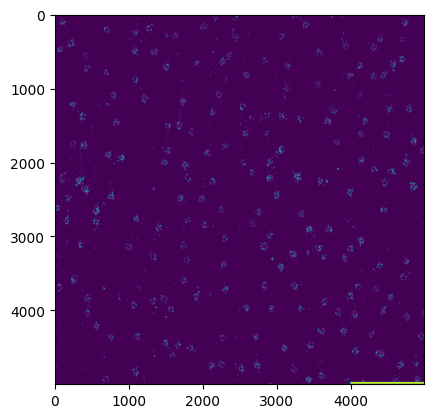

In [2]:
image = sk.io.imread('./../../../../Downloads/img_cell_C49_F1.tif')
image = sk.color.rgb2gray(image)
plt.imshow(image)

In [3]:
dots = dotim(image=image, is2D=True)
convdeconv = dots.conv_deconv(times=1, binshape=(5,5)) 
dilated = sk.morphology.binary_dilation(convdeconv, footprint=sk.morphology.disk(5))
## 11.8 sec
## 8.5 sec with blocksize in conv

In [4]:
mask = dots.get_mask()
mask = mask.astype(np.uint8)

## 5.8 sec

Text(0.5, 1.0, 'Mask, (5,5)')

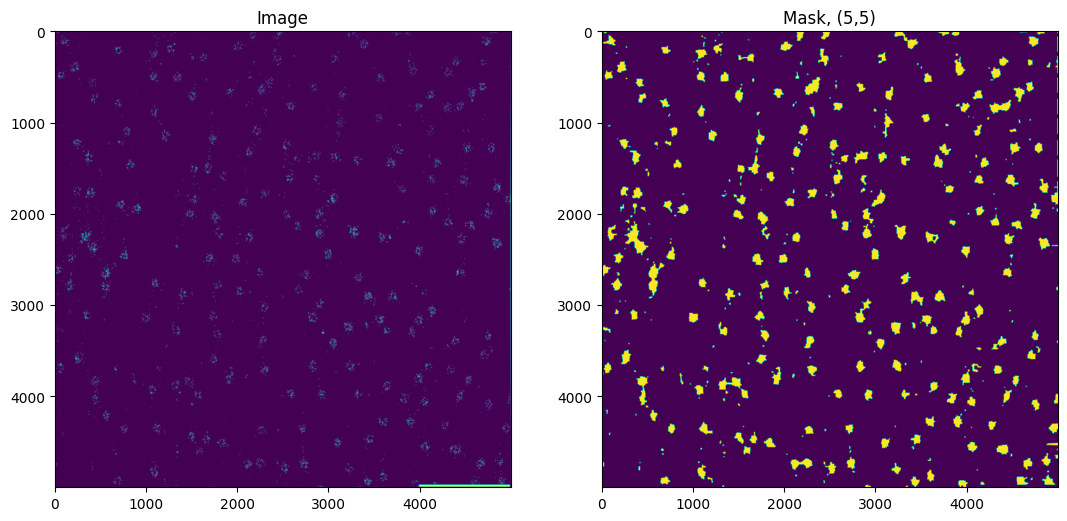

In [5]:
plt.figure(figsize=(20,20))
plt.subplot(131)
plt.imshow(image)
plt.title('Image')
plt.subplot(132)
# plt.imshow(dilated)
# plt.title('Dilated dottamine')
# plt.subplot(133)
plt.imshow(mask)
plt.title('Mask, (5,5)')

In [58]:
def watershed(mask, footprint=(3,3)):
    distance = ndi.distance_transform_edt(mask)
    coords = sk.feature.peak_local_max(distance, footprint=np.ones(footprint), labels=mask)
    mask_w = np.zeros(distance.shape, dtype=bool)
    mask_w[tuple(coords.T)] = True
    markers, _ = ndi.label(mask_w)
    labels = sk.segmentation.watershed(-distance, markers, mask=mask)

    return labels

def num_labels(labels):
    unique_labels = np.unique(labels)
    # Exclude the background label (0) if it exists
    if 0 in unique_labels:
        num_labels = len(unique_labels) - 1
    else:
        num_labels = len(unique_labels)

    print("Number of labels:", num_labels)

vals = np.linspace(0,1,500)
np.random.shuffle(vals)
cmap = plt.cm.colors.ListedColormap(plt.cm.jet(vals))

In [31]:
distance = ndi.distance_transform_edt(mask)
coords = sk.feature.peak_local_max(distance, footprint=np.ones((50, 50)), labels=mask)
mask_w = np.zeros(distance.shape, dtype=bool)
mask_w[tuple(coords.T)] = True
markers, _ = ndi.label(mask_w)
labels = sk.segmentation.watershed(-distance, markers, mask=mask)

In [43]:
num_labels(labels)

Number of labels: 506


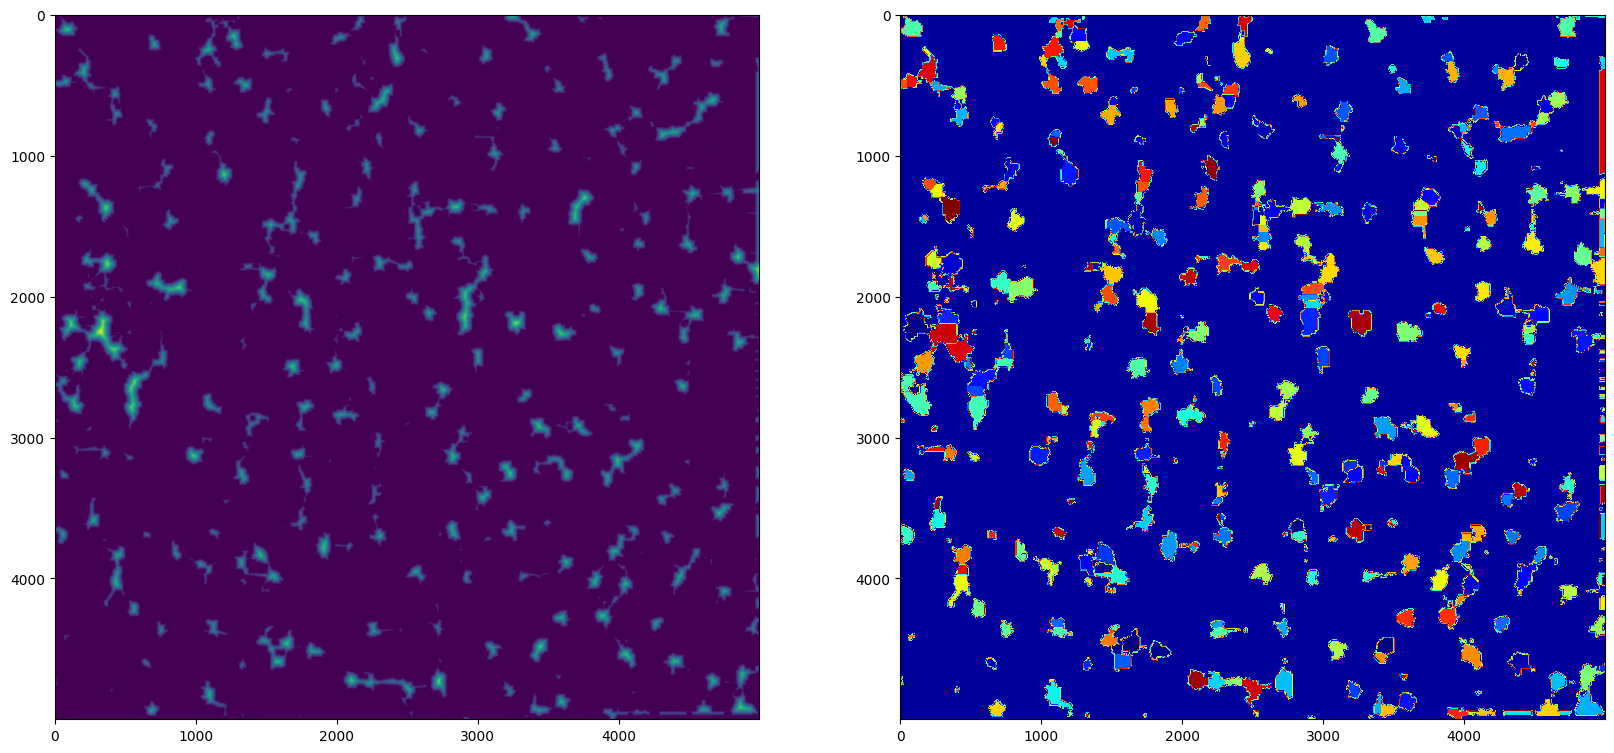

In [52]:
plt.figure(figsize=(20,20))
plt.subplot(121)
plt.imshow(distance)
plt.subplot(122)
plt.imshow(labels, cmap=cmap)

In [34]:
# Measure properties of labeled regions
props = sk.measure.regionprops(labels)

# Define size thresholds
min_size = 1000  # Minimum size threshold
max_size = 1000000  # Maximum size threshold

# Create an array to hold the filtered labels
filtered_labels = np.zeros_like(labels)

# Iterate over the properties and keep labels that meet the size criteria
for prop in props:
    if min_size <= prop.area <= max_size:
        filtered_labels[labels == prop.label] = prop.label

# Get the number of remaining labels
unique_filtered_labels = np.unique(filtered_labels)
# Exclude the background label (0) if it exists
if 0 in unique_filtered_labels:
    num_filtered_labels = len(unique_filtered_labels) - 1
else:
    num_filtered_labels = len(unique_filtered_labels)

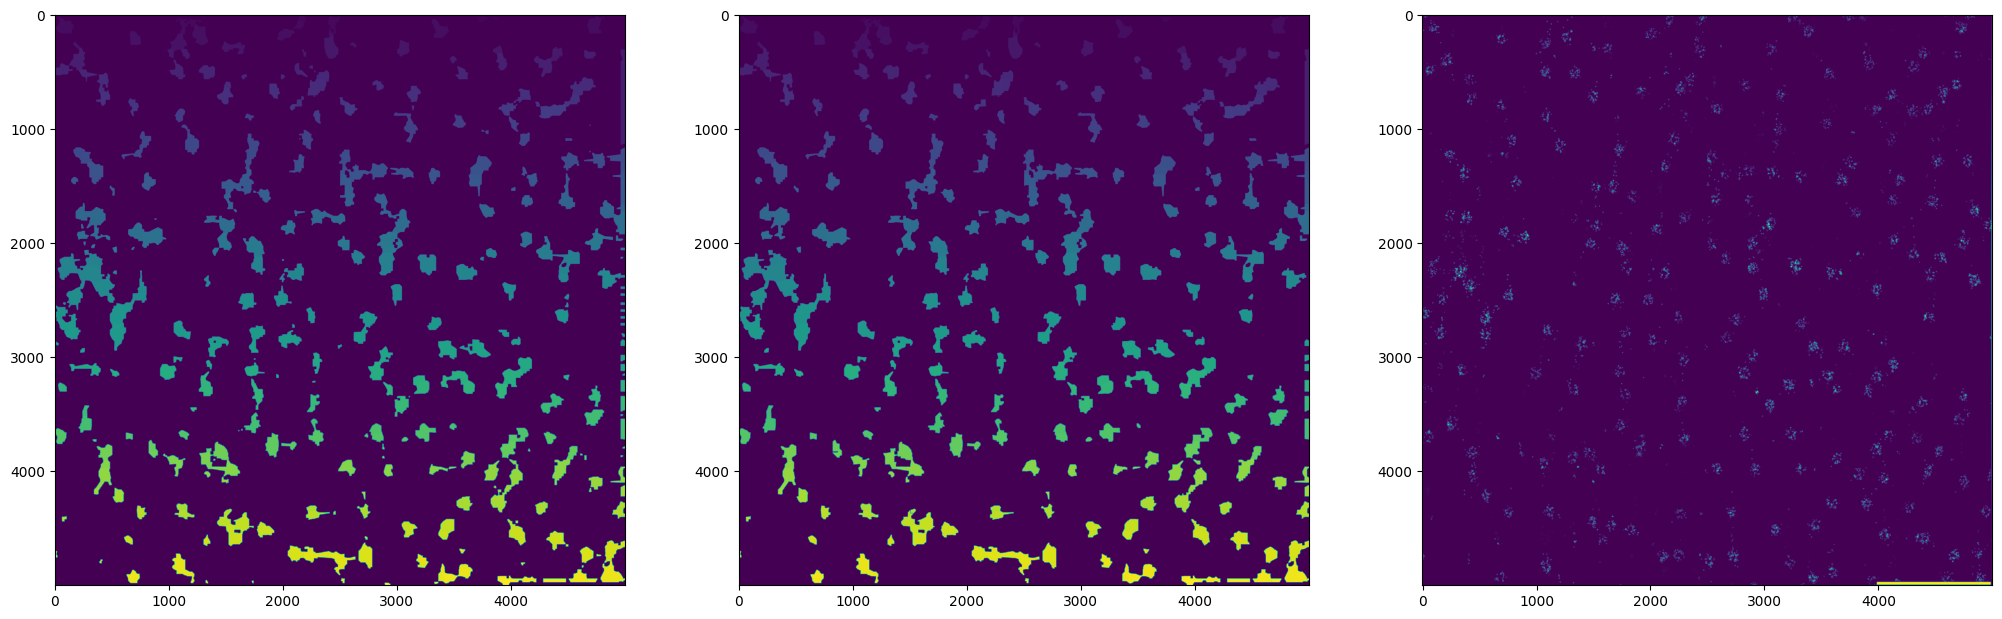

In [35]:
plt.figure(figsize=(25,25))
plt.subplot(131)
plt.imshow(labels)
plt.subplot(132)
plt.imshow(filtered_labels)
plt.subplot(133)
plt.imshow(image)

In [38]:
dilated_filtered_labels = sk.morphology.dilation(filtered_labels, footprint=sk.morphology.disk(10))
dilated_filtered_labels = sk.morphology.dilation(dilated_filtered_labels, footprint=sk.morphology.disk(10))
dilated_filtered_labels = sk.morphology.dilation(dilated_filtered_labels, footprint=sk.morphology.disk(10))


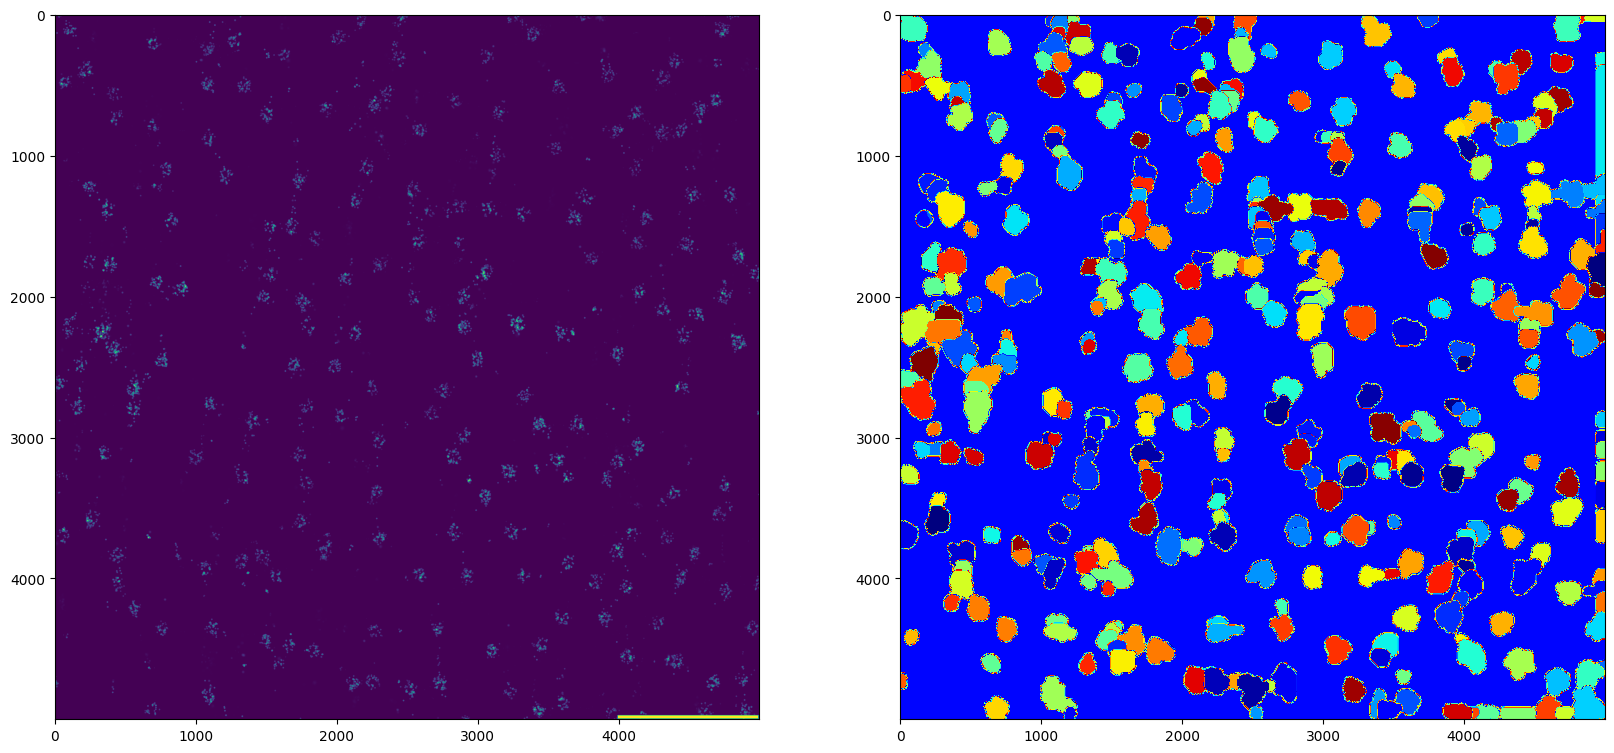

In [59]:
plt.figure(figsize=(20,20))
plt.subplot(121)
plt.imshow(image)
plt.subplot(122)
plt.imshow(dilated_filtered_labels, cmap=cmap)

In [40]:
mask_2 = np.zeros(dilated_filtered_labels.shape)
mask_2[dilated_filtered_labels > 0] = 1
watershed_2 = watershed(mask_2.astype(np.uint8), footprint=(80,80))

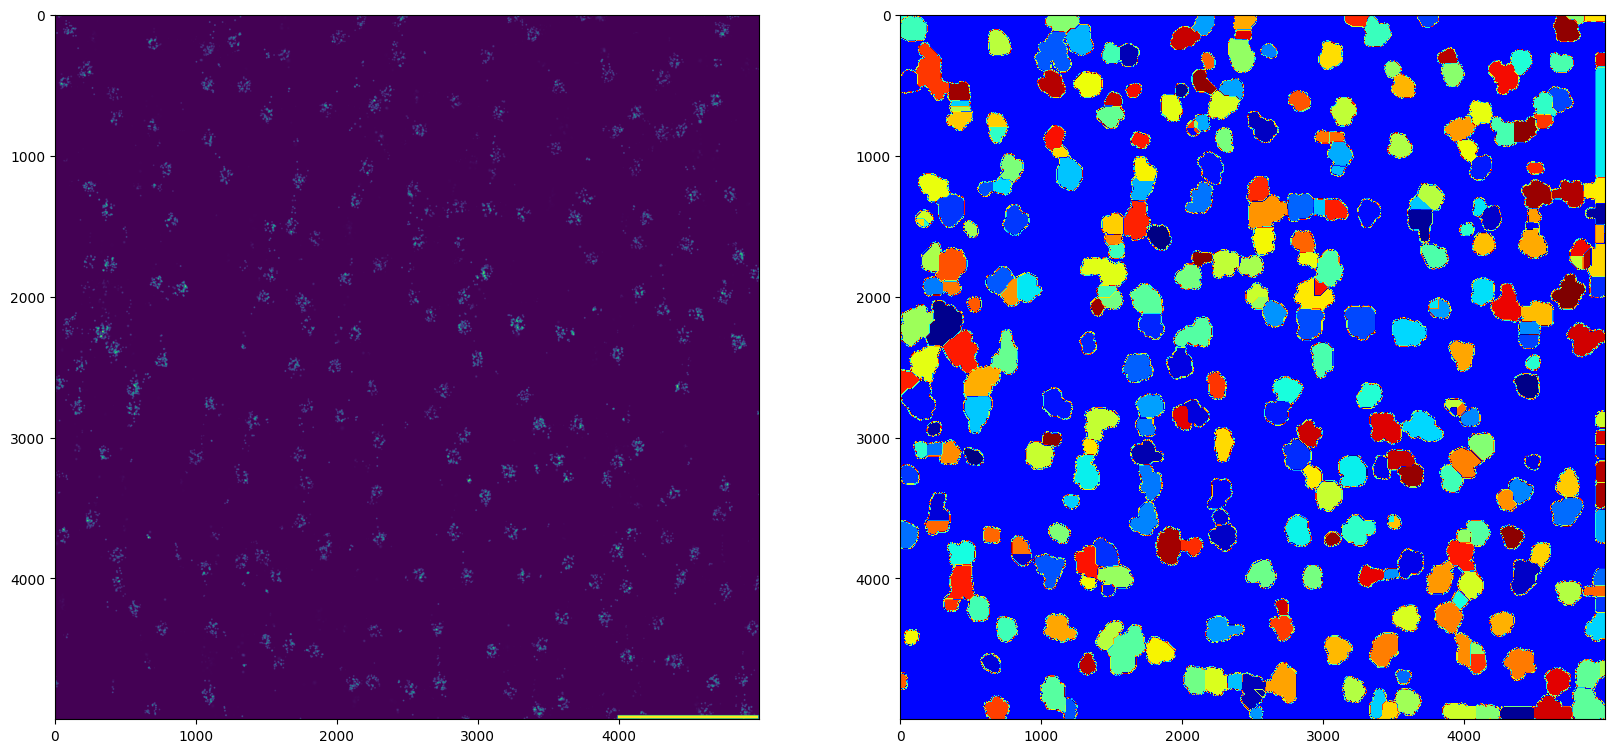

In [60]:
plt.figure(figsize=(20,20))
plt.subplot(121)
plt.imshow(image)
plt.subplot(122)
plt.imshow(watershed_2, cmap=cmap)

In [57]:
num_labels(watershed_2)

Number of labels: 329
